In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB


In [30]:
df = pd.read_csv("C:/Users/ajayk/Downloads/CreditCardData.csv") # Update your location


1. EDA

In [31]:
df.head()

,Transaction ID,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
0,#3577 209,14-Oct-20,Wednesday,19,Visa,Tap,£5,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25.2,RBS,0
1,#3039 221,14-Oct-20,Wednesday,17,MasterCard,PIN,£288,POS,Services,USA,USA,USA,F,49.6,Lloyds,0
2,#2694 780,14-Oct-20,Wednesday,14,Visa,Tap,£5,POS,Restaurant,India,India,India,F,42.2,Barclays,0
3,#2640 960,13-Oct-20,Tuesday,14,Visa,Tap,£28,POS,Entertainment,United Kingdom,India,United Kingdom,F,51.0,Barclays,0
4,#2771 031,13-Oct-20,Tuesday,23,Visa,CVC,£91,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,1


In [32]:
df.describe

<bound method NDFrame.describe of       Transaction ID       Date Day of Week  Time Type of Card Entry Mode  \
0          #3577 209  14-Oct-20   Wednesday    19         Visa        Tap   
1          #3039 221  14-Oct-20   Wednesday    17   MasterCard        PIN   
2          #2694 780  14-Oct-20   Wednesday    14         Visa        Tap   
3          #2640 960  13-Oct-20     Tuesday    14         Visa        Tap   
4          #2771 031  13-Oct-20     Tuesday    23         Visa        CVC   
...              ...        ...         ...   ...          ...        ...   
99995      #3203 892  13-Oct-20     Tuesday    22   MasterCard        Tap   
99996      #3304 849  14-Oct-20   Wednesday    23   MasterCard        PIN   
99997      #3532 129  13-Oct-20     Tuesday    11   MasterCard        PIN   
99998      #3107 092  14-Oct-20   Wednesday    22         Visa        Tap   
99999      #3400 711  14-Oct-20   Wednesday    16         Visa        PIN   

      Amount Type of Transaction Merchant

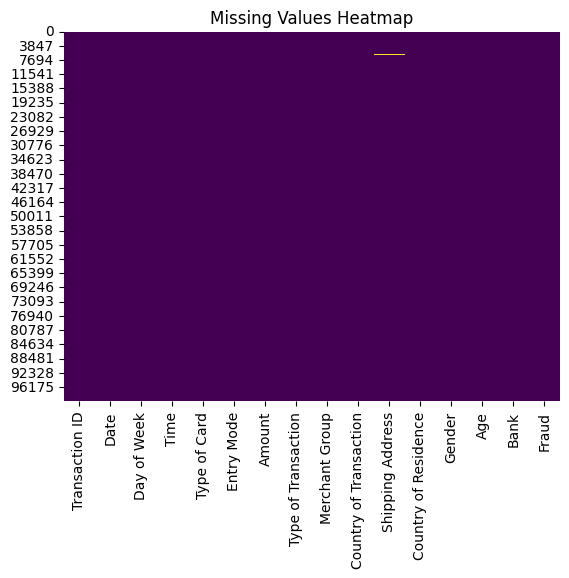

In [33]:
df.isnull().sum()
# Visualize missing values
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

Filling Missing Values - There are 6 Missing Values in the amount , which we will replace by Mean.

In [34]:
df['Amount'] = df['Amount'].str.replace('£', '', regex=False).astype(float) # Remove Currency Symbol and covert to numeric
df['Amount'].fillna(df['Amount'].mean(), inplace=True)


Removing Rows which has NA or missing values. Removing them because these are non-numerical Rows.

Merchant Group - 10

Shipping Address - 5

Gender - 4

In [35]:
df = df.dropna()
df.isnull().sum()

Transaction ID            0
Date                      0
Day of Week               0
Time                      0
Type of Card              0
Entry Mode                0
Amount                    0
Type of Transaction       0
Merchant Group            0
Country of Transaction    0
Shipping Address          0
Country of Residence      0
Gender                    0
Age                       0
Bank                      0
Fraud                     0
dtype: int64

In [36]:
df.describe

<bound method NDFrame.describe of       Transaction ID       Date Day of Week  Time Type of Card Entry Mode  \
0          #3577 209  14-Oct-20   Wednesday    19         Visa        Tap   
1          #3039 221  14-Oct-20   Wednesday    17   MasterCard        PIN   
2          #2694 780  14-Oct-20   Wednesday    14         Visa        Tap   
3          #2640 960  13-Oct-20     Tuesday    14         Visa        Tap   
4          #2771 031  13-Oct-20     Tuesday    23         Visa        CVC   
...              ...        ...         ...   ...          ...        ...   
99995      #3203 892  13-Oct-20     Tuesday    22   MasterCard        Tap   
99996      #3304 849  14-Oct-20   Wednesday    23   MasterCard        PIN   
99997      #3532 129  13-Oct-20     Tuesday    11   MasterCard        PIN   
99998      #3107 092  14-Oct-20   Wednesday    22         Visa        Tap   
99999      #3400 711  14-Oct-20   Wednesday    16         Visa        PIN   

       Amount Type of Transaction Merchan

In [37]:
df.duplicated().sum()

0

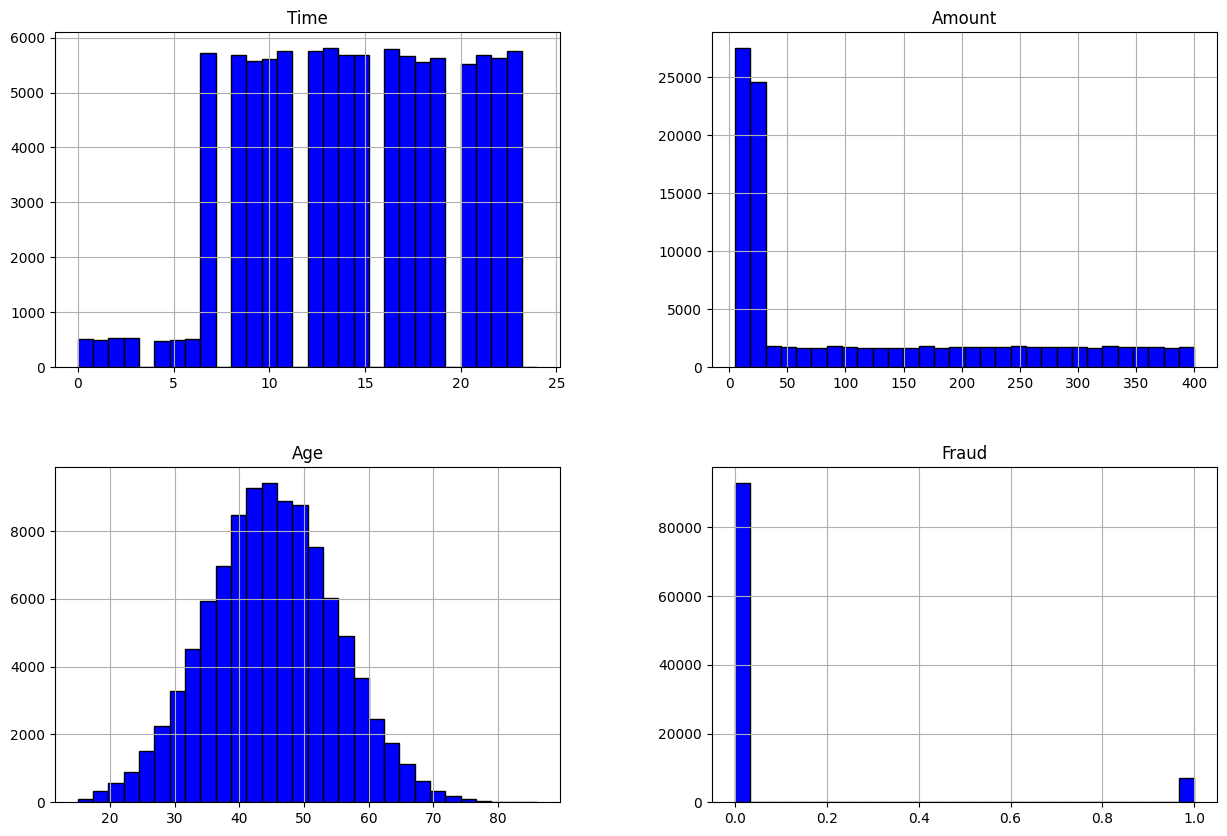

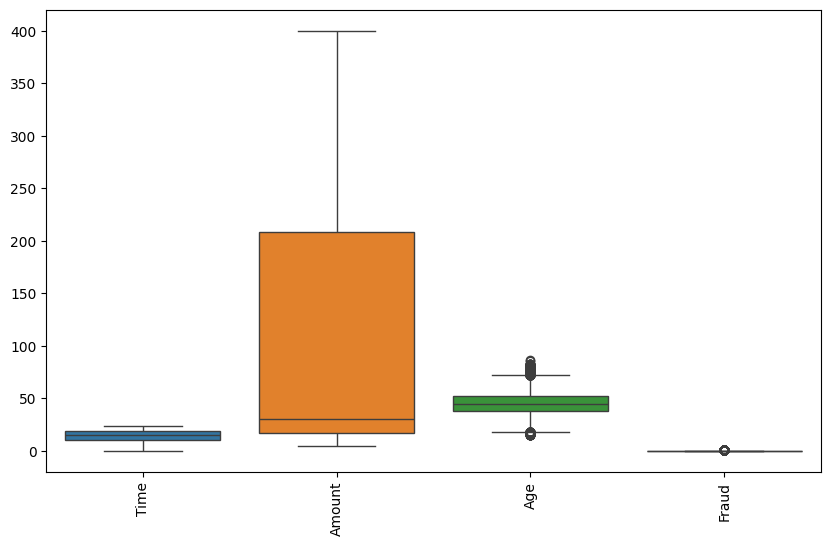

In [38]:
# Histogram for numerical data
df.hist(bins=30, figsize=(15, 10), color='blue', edgecolor='black')
plt.show()

# Boxplot to detect outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()


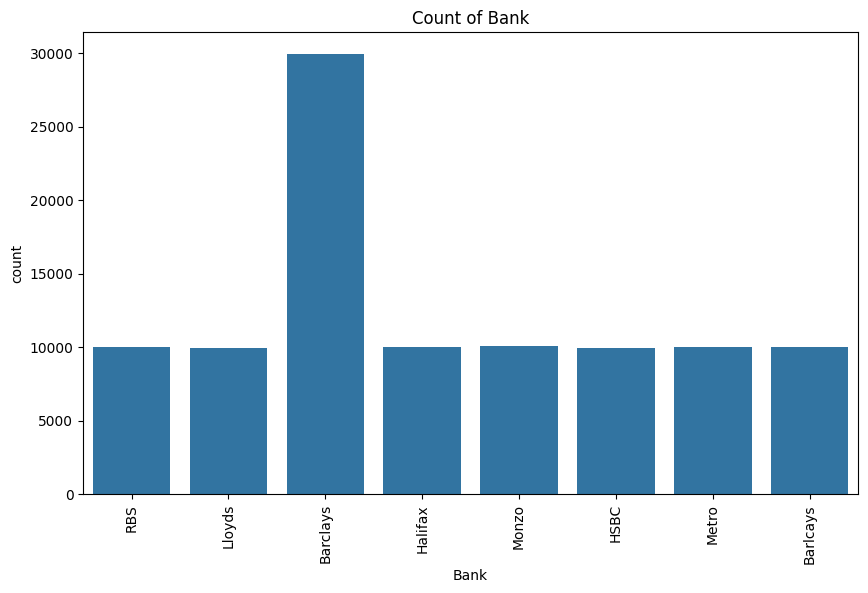

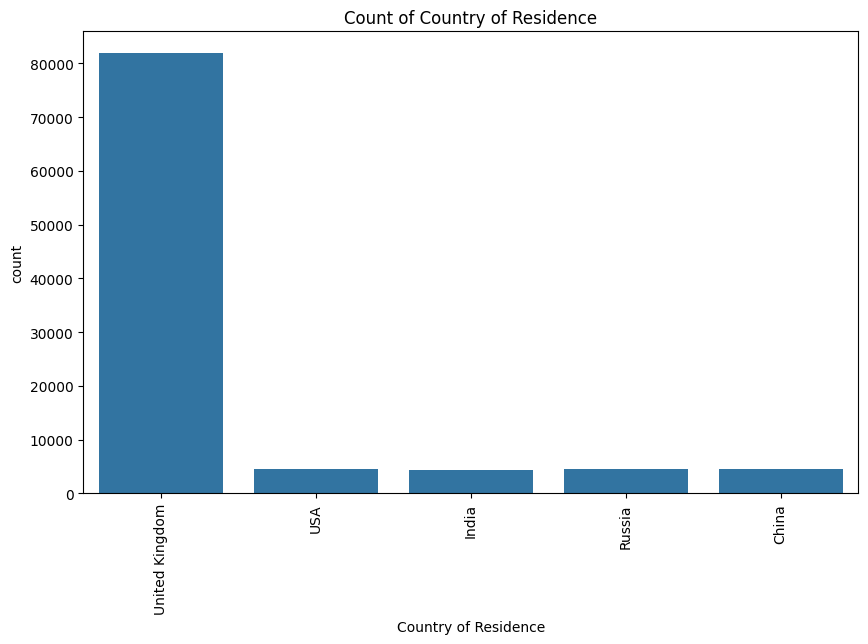

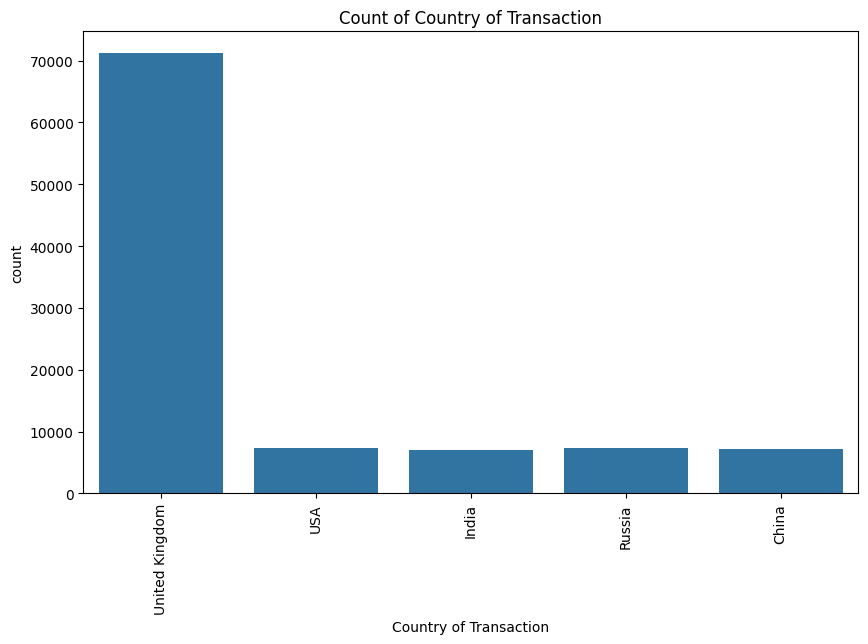

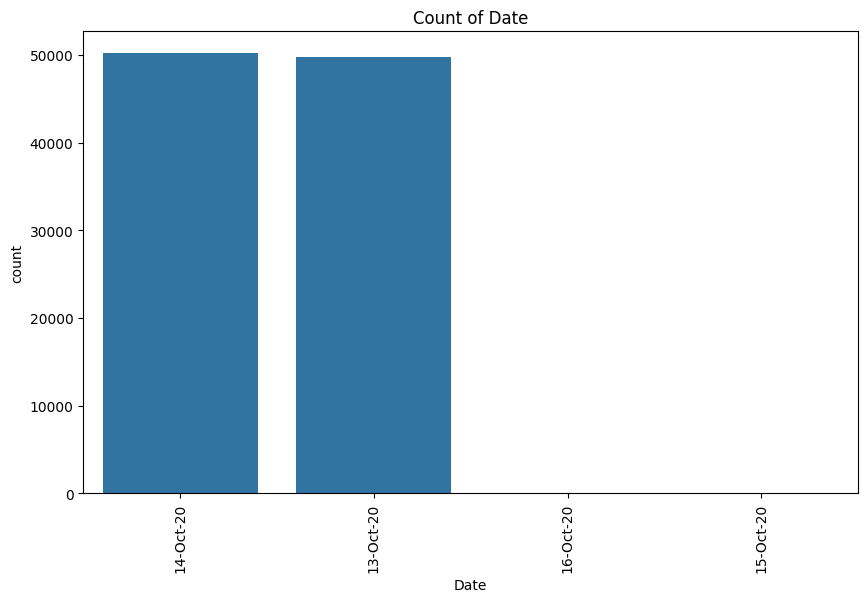

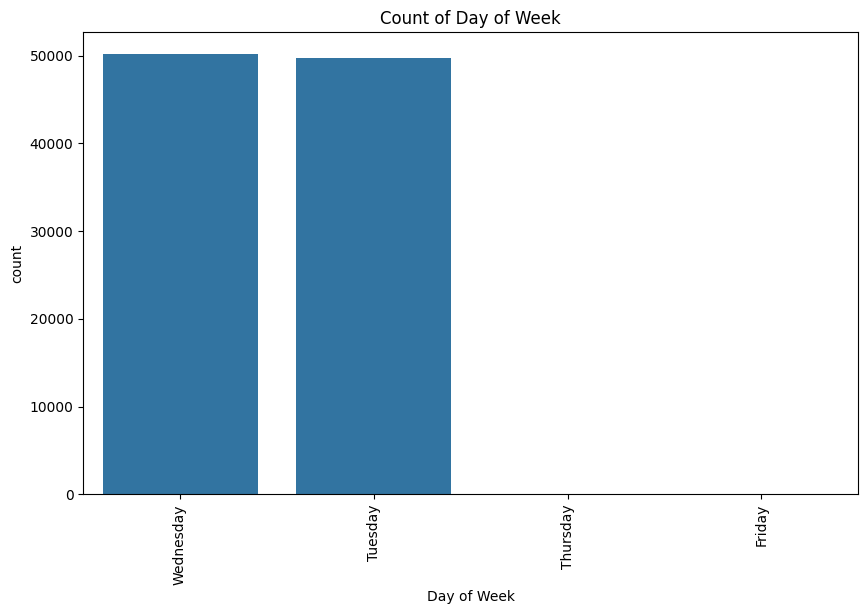

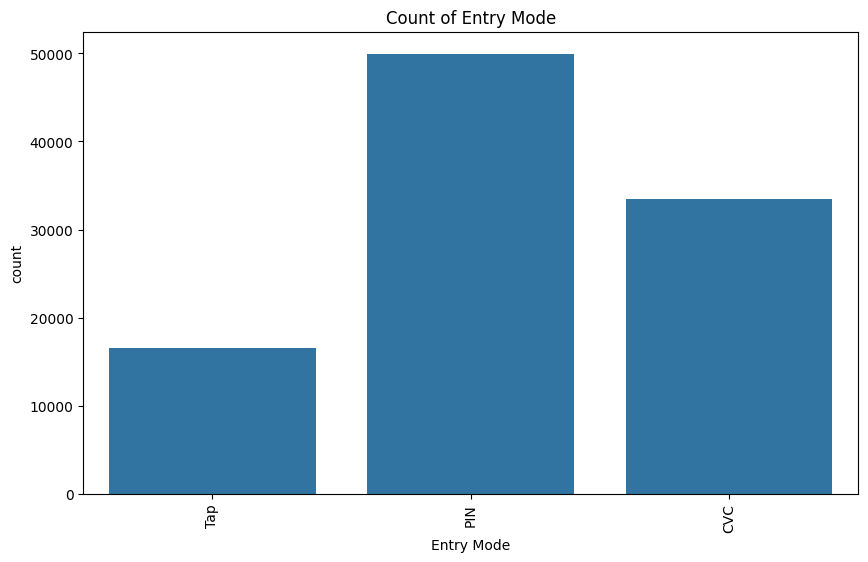

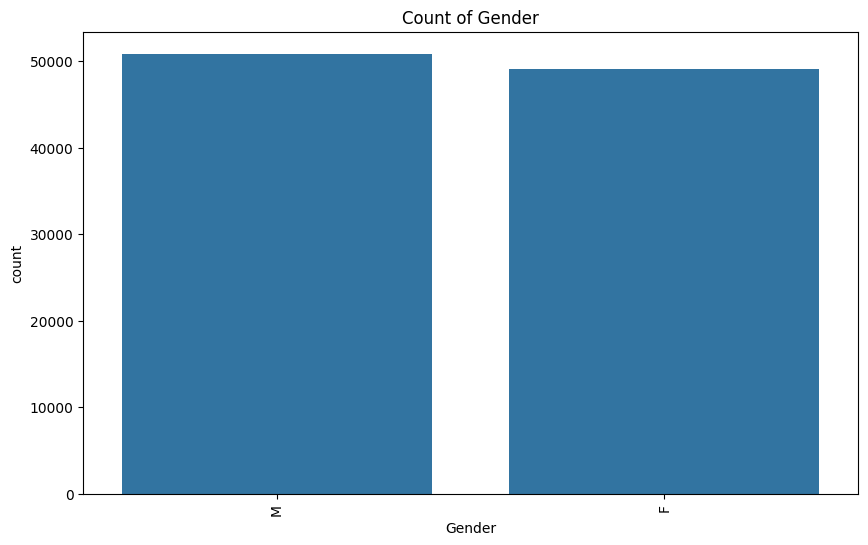

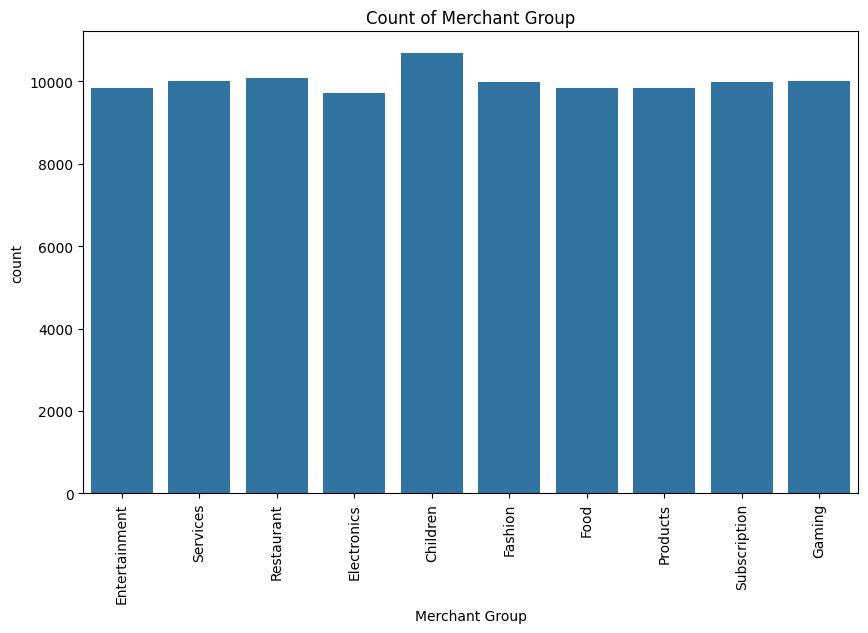

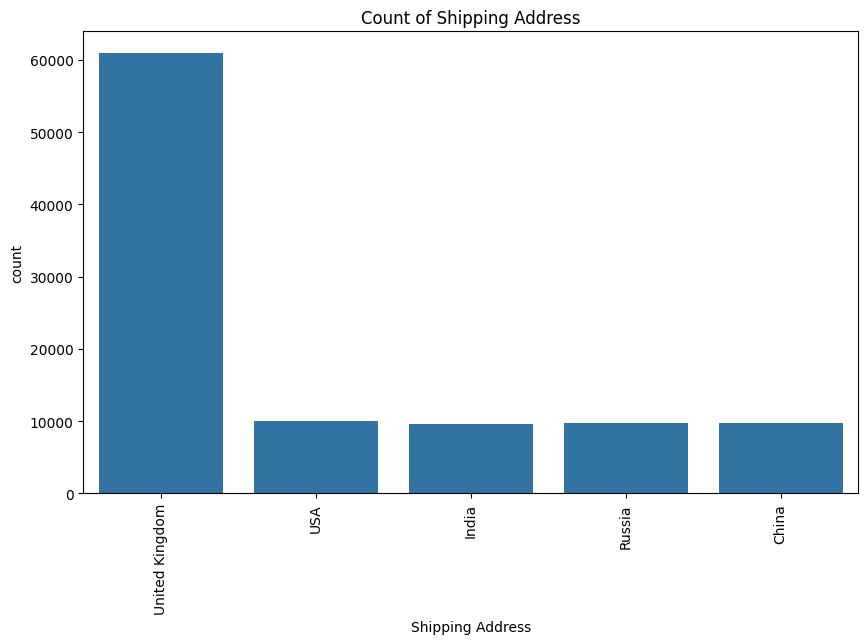

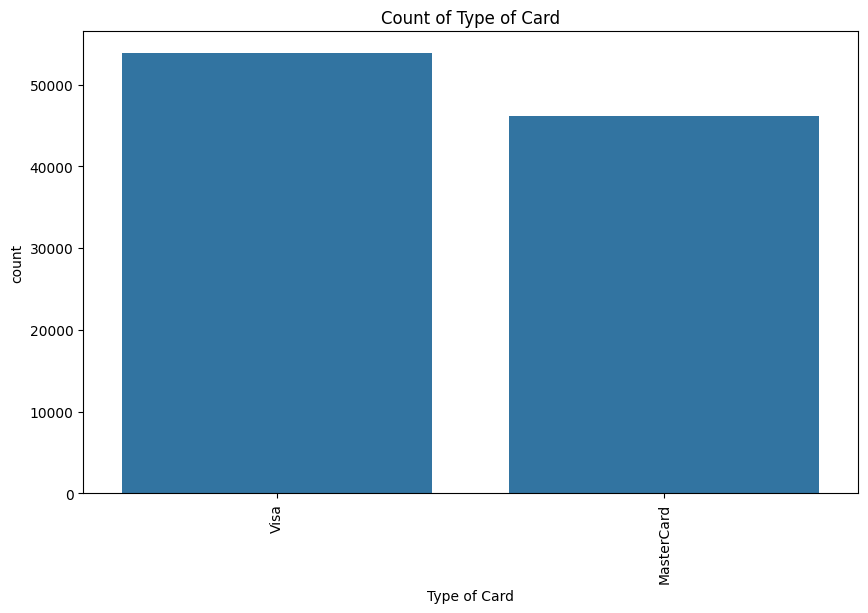

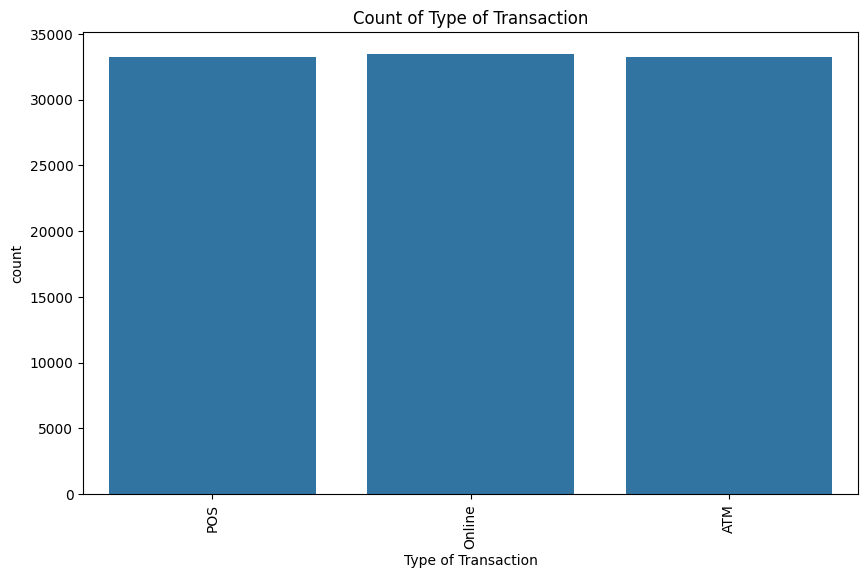

In [39]:
# Specify columns to exclude from visualization
excluded_columns = ['Transaction ID']

# Identify categorical columns excluding the specified ones
categorical_columns = df.select_dtypes(include=['object']).columns.difference(excluded_columns)

# Plot bar plots for the remaining categorical columns
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=df)
    plt.title(f"Count of {col}")
    plt.xticks(rotation=90)
    plt.show()



Correlation Matrix

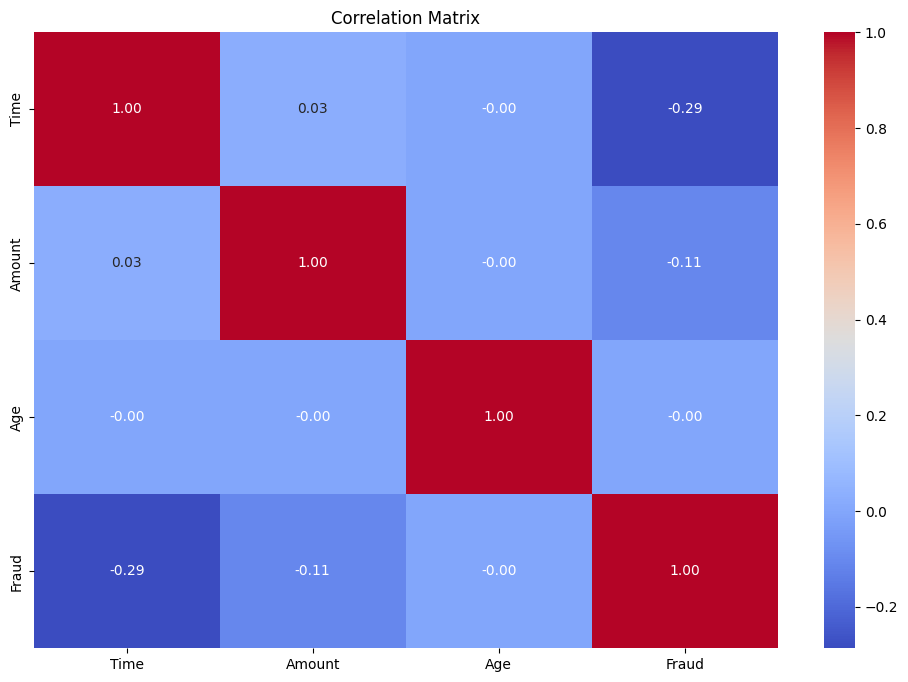

In [40]:
plt.figure(figsize=(12, 8))

# Select only numerical columns for correlation
numerical_columns = df.select_dtypes(include=['number'])
correlation_matrix = numerical_columns.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Outliers - Amount has a huge outlier variance along with Age,time.

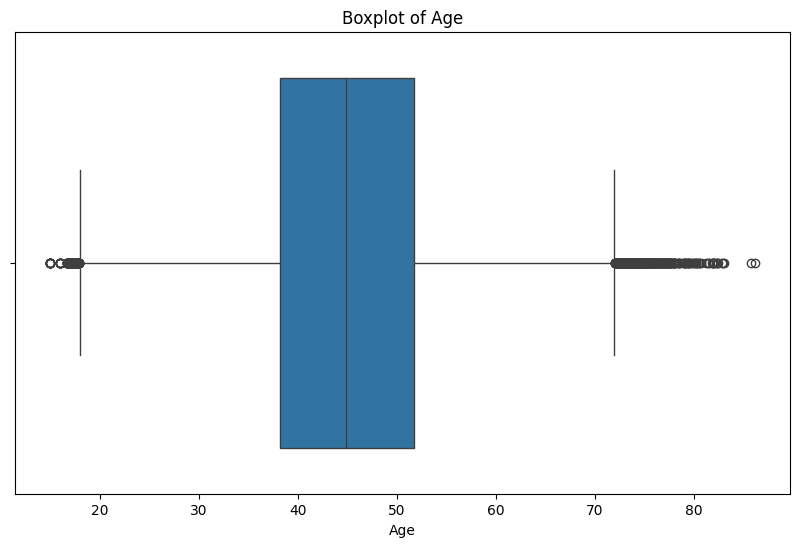

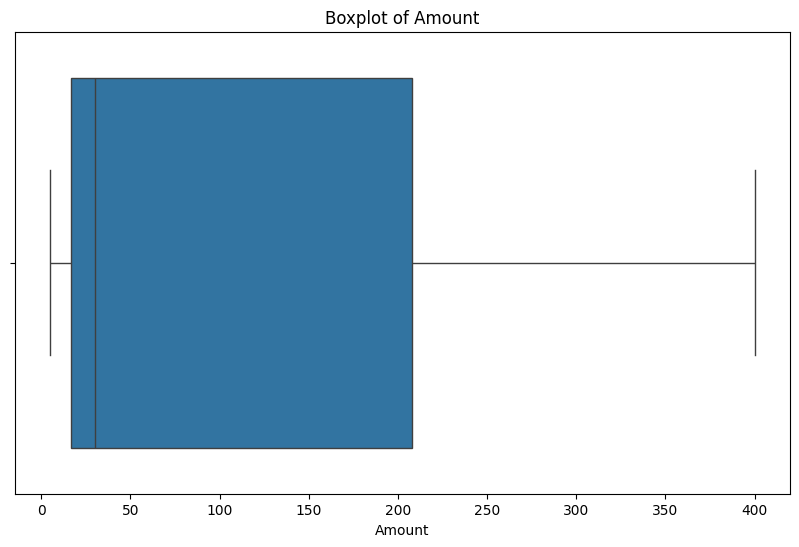

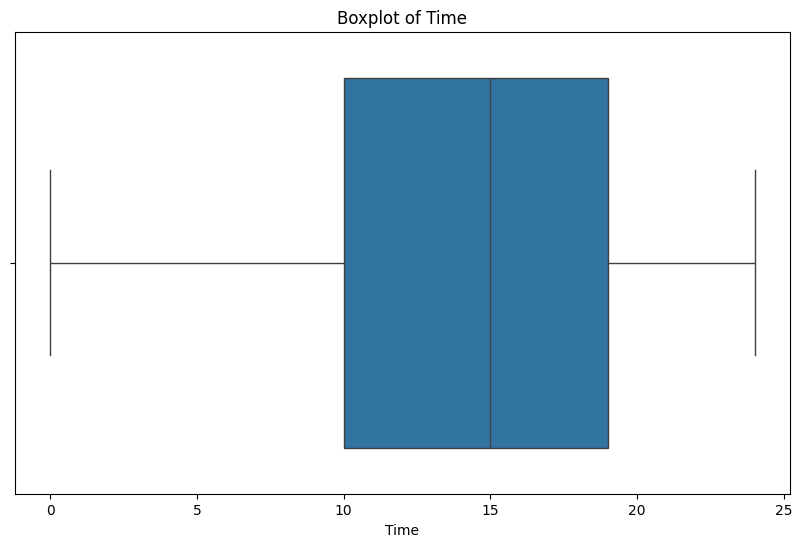

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Identify numerical columns excluding 'Fraud' and 'Transaction ID'
numerical_columns = df.select_dtypes(include=['number']).columns.difference(['Fraud'])

# Plot boxplots for numerical columns
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# Function to remove outliers from selected numerical columns using IQR
def remove_outliers_iqr_selected(df, exclude_columns):
    numerical_columns = df.select_dtypes(include=['number']).columns.difference(exclude_columns)
    df_cleaned = df.copy()

    for column in numerical_columns:
        Q1 = df_cleaned[column].quantile(0.25)  # First quartile
        Q3 = df_cleaned[column].quantile(0.75)  # Third quartile
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]

    return df_cleaned

# Exclude 'Fraud' and 'Transaction ID' from outlier removal
excluded_columns = ['Fraud', 'Transaction ID']
df_cleaned = remove_outliers_iqr_selected(df, excluded_columns)


In [42]:
df_cleaned.describe

<bound method NDFrame.describe of       Transaction ID       Date Day of Week  Time Type of Card Entry Mode  \
0          #3577 209  14-Oct-20   Wednesday    19         Visa        Tap   
1          #3039 221  14-Oct-20   Wednesday    17   MasterCard        PIN   
2          #2694 780  14-Oct-20   Wednesday    14         Visa        Tap   
3          #2640 960  13-Oct-20     Tuesday    14         Visa        Tap   
4          #2771 031  13-Oct-20     Tuesday    23         Visa        CVC   
...              ...        ...         ...   ...          ...        ...   
99995      #3203 892  13-Oct-20     Tuesday    22   MasterCard        Tap   
99996      #3304 849  14-Oct-20   Wednesday    23   MasterCard        PIN   
99997      #3532 129  13-Oct-20     Tuesday    11   MasterCard        PIN   
99998      #3107 092  14-Oct-20   Wednesday    22         Visa        Tap   
99999      #3400 711  14-Oct-20   Wednesday    16         Visa        PIN   

       Amount Type of Transaction Merchan

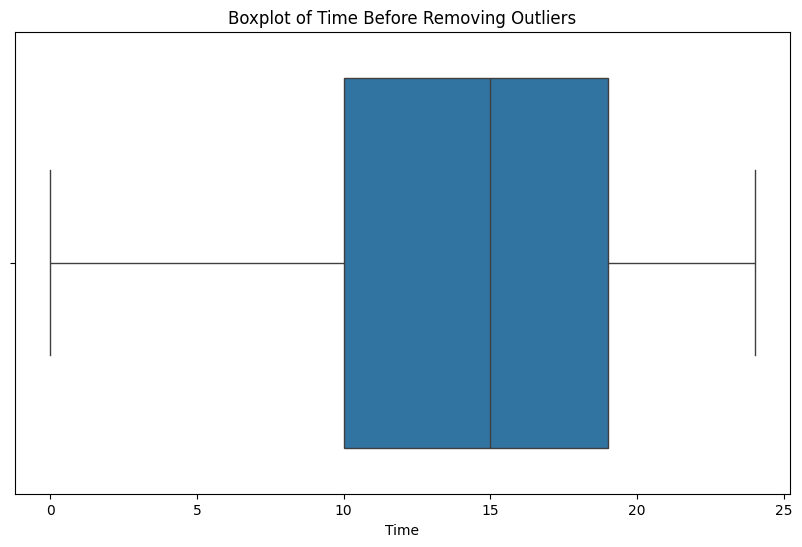

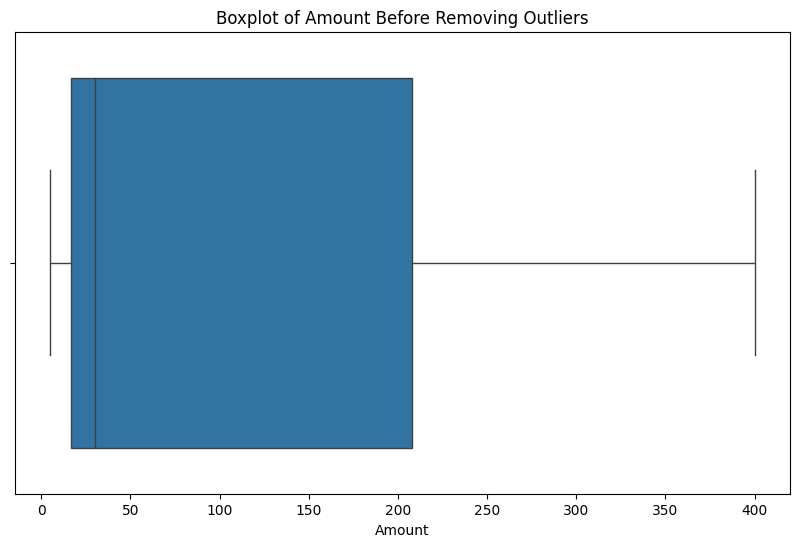

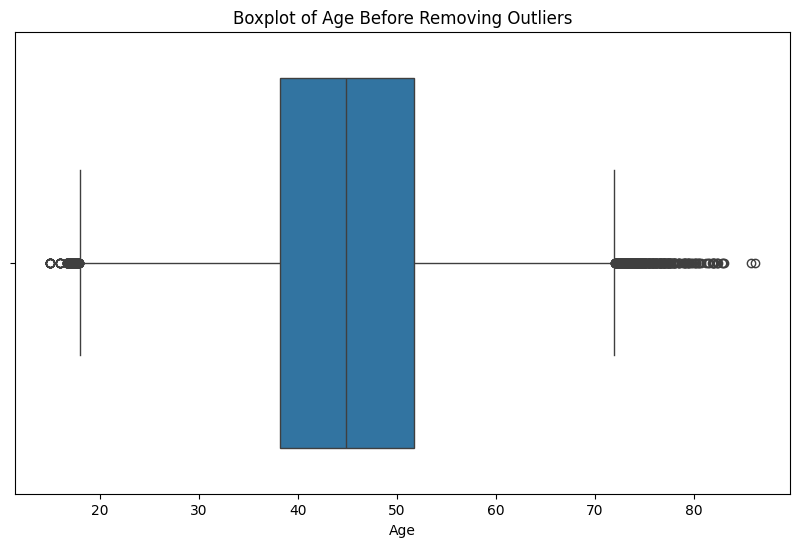

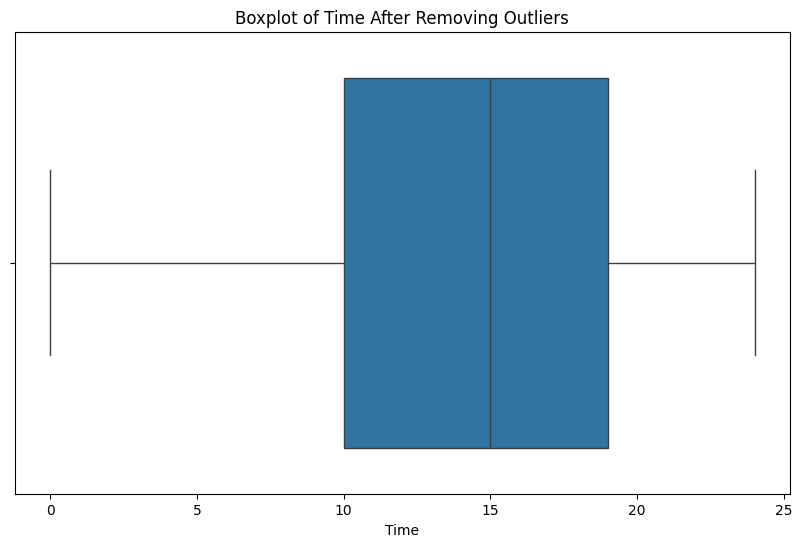

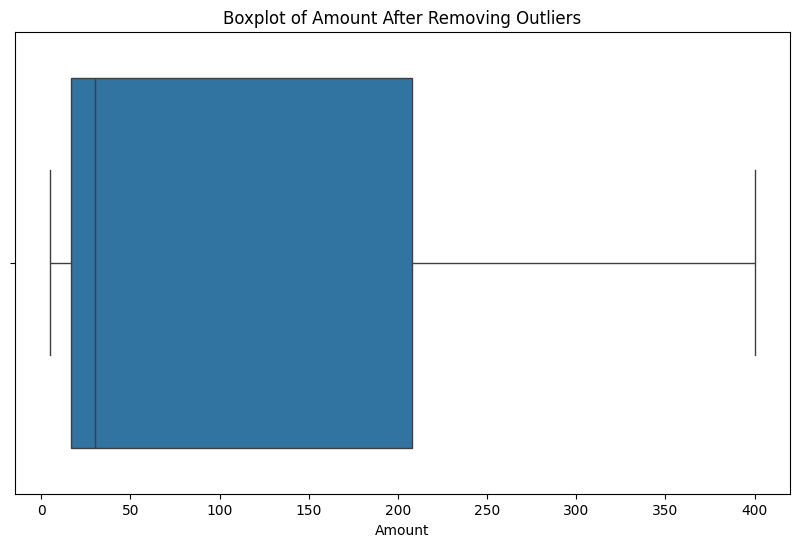

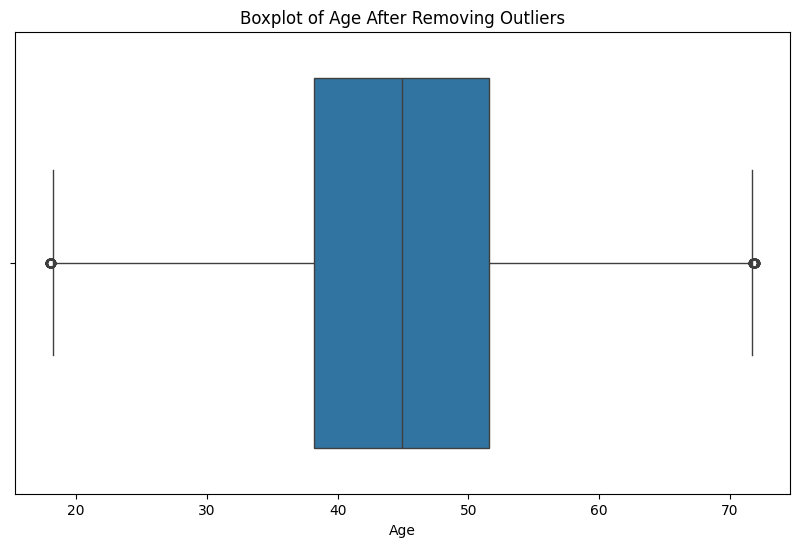

In [43]:
# List of columns to exclude
columns_to_exclude = ['Fraud', 'Transaction ID', 'Day of Week', 'Country of Transaction', 'Country of Residence']

# Visualize outliers before removing them (excluding specified columns)
for column in df.drop(columns=columns_to_exclude).select_dtypes(include=['number']).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot of {column} Before Removing Outliers")
    plt.show()

# Visualize outliers after removing them (excluding specified columns)
for column in df_cleaned.drop(columns=columns_to_exclude).select_dtypes(include=['number']).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_cleaned[column])
    plt.title(f"Boxplot of {column} After Removing Outliers")
    plt.show()


In [44]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Select categorical columns
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns

# Apply label encoding to each categorical column
for col in categorical_columns:
    df_cleaned[col] = label_encoder.fit_transform(df_cleaned[col])

# Show the dataset after label encoding
print(df_cleaned.head())


   Transaction ID  Date  Day of Week  Time  Type of Card  Entry Mode  Amount  \
0           85957     1            3    19             1           2     5.0   
1           41023     1            3    17             0           1   288.0   
2           12454     1            3    14             1           2     5.0   
3            7888     0            2    14             1           2    28.0   
4           18813     0            2    23             1           0    91.0   

   Type of Transaction  Merchant Group  Country of Transaction  \
0                    2               2                       4   
1                    2               8                       3   
2                    2               7                       1   
3                    2               2                       4   
4                    1               1                       3   

   Shipping Address  Country of Residence  Gender   Age  Bank  Fraud  
0                 4                     4       1  

In [45]:
# Separate features and target
X = df_cleaned.drop(columns=['Fraud'])  
y = df_cleaned['Fraud']

Random Forest Classifier

Confusion Matrix:
[[18430    17]
 [  264  1184]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     18447
           1       0.99      0.82      0.89      1448

    accuracy                           0.99     19895
   macro avg       0.99      0.91      0.94     19895
weighted avg       0.99      0.99      0.99     19895


Feature Importances:
Transaction ID: 0.0415
Date: 0.0039
Day of Week: 0.0040
Time: 0.3568
Type of Card: 0.0113
Entry Mode: 0.0190
Amount: 0.0797
Type of Transaction: 0.0129
Merchant Group: 0.0370
Country of Transaction: 0.1307
Shipping Address: 0.0779
Country of Residence: 0.1525
Gender: 0.0123
Age: 0.0401
Bank: 0.0203


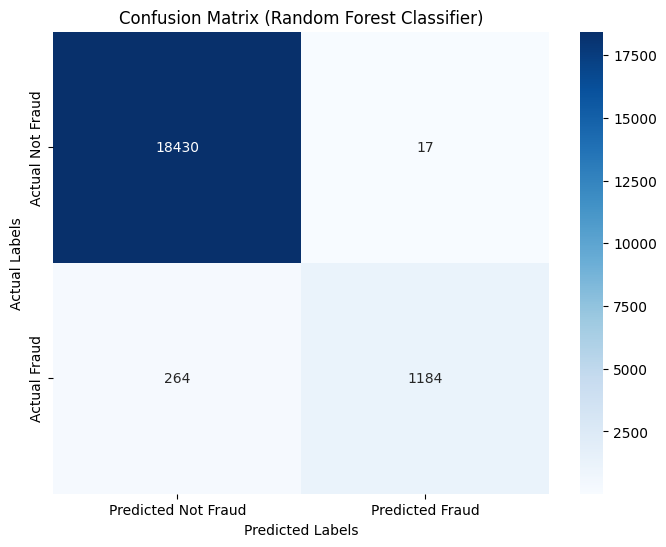

In [46]:
# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier with 100 trees
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model on the training data
rf_model.fit(X_train, y_train)

# Predict the labels for the test dataset
y_pred = rf_model.predict(X_test)

# Generate and print the confusion matrix (shows true vs. predicted labels)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Generate and print the classification report (shows precision, recall, F1-score, etc.)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate and display feature importances (optional)
# This shows which features contribute the most to the model's predictions
importances = rf_model.feature_importances_
print("\nFeature Importances:")
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance:.4f}")

# Generate confusion matrix for the Random Forest model
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Not Fraud', 'Predicted Fraud'], yticklabels=['Actual Not Fraud', 'Actual Fraud'])
plt.title("Confusion Matrix (Random Forest Classifier)")
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()

SVM

Confusion Matrix (SVM):
[[18447     0]
 [ 1448     0]]

Classification Report (SVM):
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     18447
           1       0.00      0.00      0.00      1448

    accuracy                           0.93     19895
   macro avg       0.46      0.50      0.48     19895
weighted avg       0.86      0.93      0.89     19895



C:\Users\ajayk\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ajayk\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ajayk\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

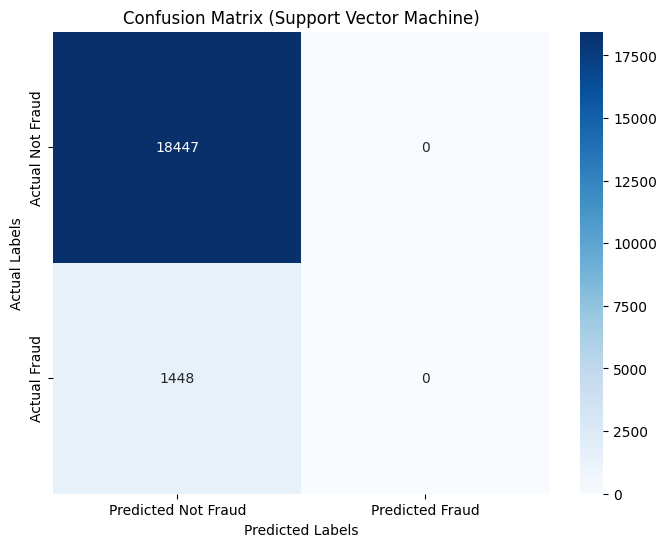

In [47]:
# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Support Vector Machine (SVM) model
# 'rbf' is the Radial Basis Function kernel, suitable for nonlinear relationships
# C=1.0 controls the tradeoff between achieving a low error on the training set and minimizing the model complexity
svm_model = SVC(kernel='rbf', C=1.0, random_state=42)

# Train the SVM model on the training data
svm_model.fit(X_train, y_train)

# Predict the labels for the test dataset
y_pred = svm_model.predict(X_test)

# Generate and print the confusion matrix (shows true vs. predicted labels)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (SVM):")
print(cm)

# Generate and print the classification report (shows precision, recall, F1-score, etc.)
print("\nClassification Report (SVM):")
print(classification_report(y_test, y_pred))

# Generate confusion matrix for the SVM model
cm_svm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Not Fraud', 'Predicted Fraud'], yticklabels=['Actual Not Fraud', 'Actual Fraud'])
plt.title("Confusion Matrix (Support Vector Machine)")
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()

XGBoost

C:\Users\ajayk\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [12:44:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Confusion Matrix (XGBoost):
[[18398    49]
 [  240  1208]]

Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     18447
           1       0.96      0.83      0.89      1448

    accuracy                           0.99     19895
   macro avg       0.97      0.92      0.94     19895
weighted avg       0.99      0.99      0.98     19895



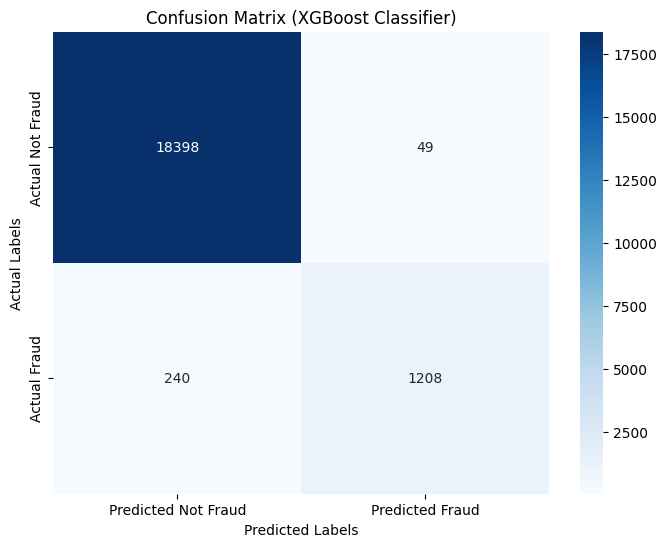

In [48]:
# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost classifier
# 'use_label_encoder=False' disables the deprecated label encoder warning
# 'eval_metric="logloss"' specifies the evaluation metric for classification
# 'random_state=42' ensures reproducibility of results
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the XGBoost model on the training data
xgb_model.fit(X_train, y_train)

# Predict the labels for the test dataset
y_pred = xgb_model.predict(X_test)

# Generate and print the confusion matrix (shows true vs. predicted labels)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (XGBoost):")
print(cm)

# Generate and print the classification report (shows precision, recall, F1-score, etc.)
print("\nClassification Report (XGBoost):")
print(classification_report(y_test, y_pred))

# Generate confusion matrix for the XGBoost model
cm_xgb = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Not Fraud', 'Predicted Fraud'], yticklabels=['Actual Not Fraud', 'Actual Fraud'])
plt.title("Confusion Matrix (XGBoost Classifier)")
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()

KNN

Confusion Matrix (k-NN):
[[18291   156]
 [  590   858]]

Classification Report (k-NN):
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18447
           1       0.85      0.59      0.70      1448

    accuracy                           0.96     19895
   macro avg       0.91      0.79      0.84     19895
weighted avg       0.96      0.96      0.96     19895



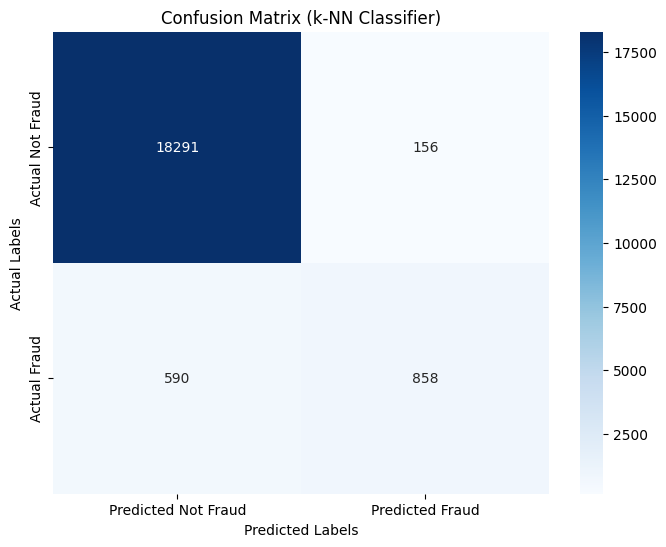

In [49]:
# Scale features to ensure all features have similar ranges
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # X is scaled, but y remains unchanged

# Split the scaled data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the k-Nearest Neighbors (k-NN) classifier
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the k-NN model on the training data
knn_model.fit(X_train, y_train)

# Predict the labels for the test dataset
y_pred = knn_model.predict(X_test)

# Generate and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (k-NN):")
print(cm)

# Generate and print the classification report
print("\nClassification Report (k-NN):")
print(classification_report(y_test, y_pred))

# Generate confusion matrix for the k-NN model
cm_knn = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Not Fraud', 'Predicted Fraud'], yticklabels=['Actual Not Fraud', 'Actual Fraud'])
plt.title("Confusion Matrix (k-NN Classifier)")
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()

Naye Bayes

Confusion Matrix (Naive Bayes):
[[18265   182]
 [  771   677]]

Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     18447
           1       0.79      0.47      0.59      1448

    accuracy                           0.95     19895
   macro avg       0.87      0.73      0.78     19895
weighted avg       0.95      0.95      0.95     19895



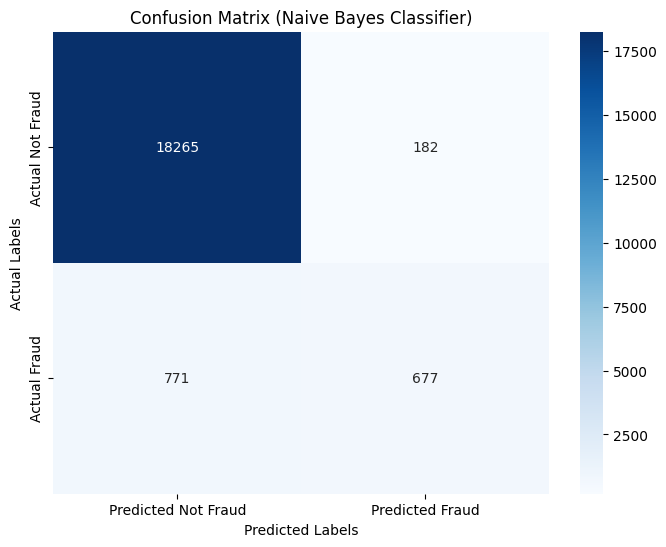

In [50]:
# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes model (GaussianNB is used for continuous features)
nb_model = GaussianNB()

# Train the Naive Bayes model on the training data
nb_model.fit(X_train, y_train)

# Predict the labels for the test dataset
y_pred = nb_model.predict(X_test)

# Generate and print the confusion matrix (shows true vs. predicted labels)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (Naive Bayes):")
print(cm)

# Generate and print the classification report (shows precision, recall, F1-score, etc.)
print("\nClassification Report (Naive Bayes):")
print(classification_report(y_test, y_pred))

# Generate confusion matrix for the Naive Bayes model
cm_nb = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Not Fraud', 'Predicted Fraud'], yticklabels=['Actual Not Fraud', 'Actual Fraud'])
plt.title("Confusion Matrix (Naive Bayes Classifier)")
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()